In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  
from IPython.display import Image  
from sklearn import tree 
from os import system 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image  
import pydotplus 
import graphviz 
from statistics import median,mean
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data=pd.read_csv(r"C:\Users\ASUS\Downloads\bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [3]:
data.shape


(45211, 17)

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [6]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]=data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [7]:
data.dtypes.to_frame('Datatypes of Attributes')

,Datatypes of Attributes
age,int64
job,category
marital,category
education,category
default,category
balance,int64
housing,category
loan,category
contact,category
day,int64


In [8]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [9]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [10]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [11]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [12]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

# Five Point Summary

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# to find outliers

# distribution of numerical columns

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

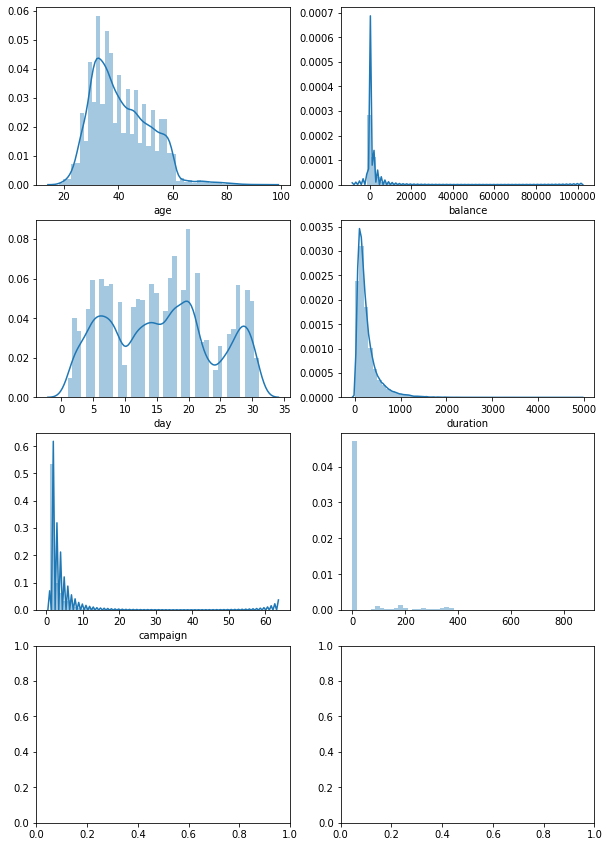

In [15]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))
axe= axe.flatten() 
sns.distplot(data['age'],ax=axe[0]) 
sns.distplot(data['balance'],ax=axe[1]) 
sns.distplot(data['day'],ax=axe[2]) 
sns.distplot(data['duration'],ax=axe[3]) 
sns.distplot(data['campaign'],ax=axe[4]) 
sns.distplot(data['pdays'],ax=axe[5]) 
sns.distplot(data['previous'],ax=axe[6]) 
fig.tight_layout() 
fig.legend()
fig.show() 
axe.flat[-1].set_visible(False)

In [19]:
#Understanding from distributions\n",
    #'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
    #'age' is somewhat normally distributed

# distribution of categorical columns

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


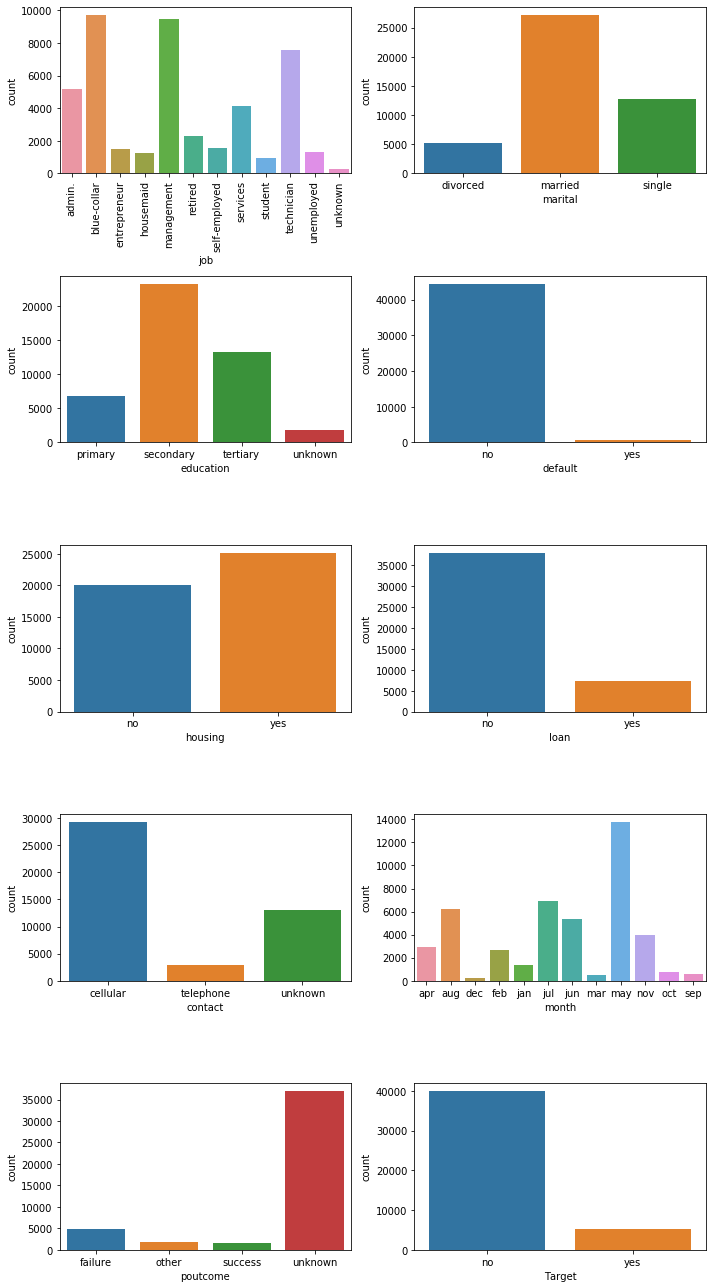

In [18]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() 
plot=sns.countplot(x=data['job'],data=data,ax=axe[0]) 
plt.setp(plot.get_xticklabels(), rotation=90)
sns.countplot(x=data['marital'],data=data,ax=axe[1]) 
sns.countplot(x=data['education'],data=data,ax=axe[2]) 
sns.countplot(x=data['default'],data=data,ax=axe[3]) 
sns.countplot(x=data['housing'],data=data,ax=axe[4]) 
sns.countplot(x=data['loan'],data=data,ax=axe[5]) 
sns.countplot(x=data['contact'],data=data,ax=axe[6]) 
sns.countplot(x=data['month'],data=data,ax=axe[7]) 
sns.countplot(x=data['poutcome'],data=data,ax=axe[8])
sns.countplot(x=data['Target'],data=data,ax=axe[9]) 
fig.tight_layout() 
fig.show() 

In [20]:
#Understanding from distributions
    # More than 90% customers have no default credit
    # Around 88% customers have not subscribed for term deposit
    # Most customers have been contacted in may
    # Most customers have been contacted by cellular network(mobile phone)
    # Number of customers who have housing loan is more than the number of customers who don't have housing loan
    # Around 6% customers have credit in default

# Measure of skewness of numerical columns

In [22]:
data.skew().to_frame('Skewness measure')

,Skewness measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


# checking the presence of outliers

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


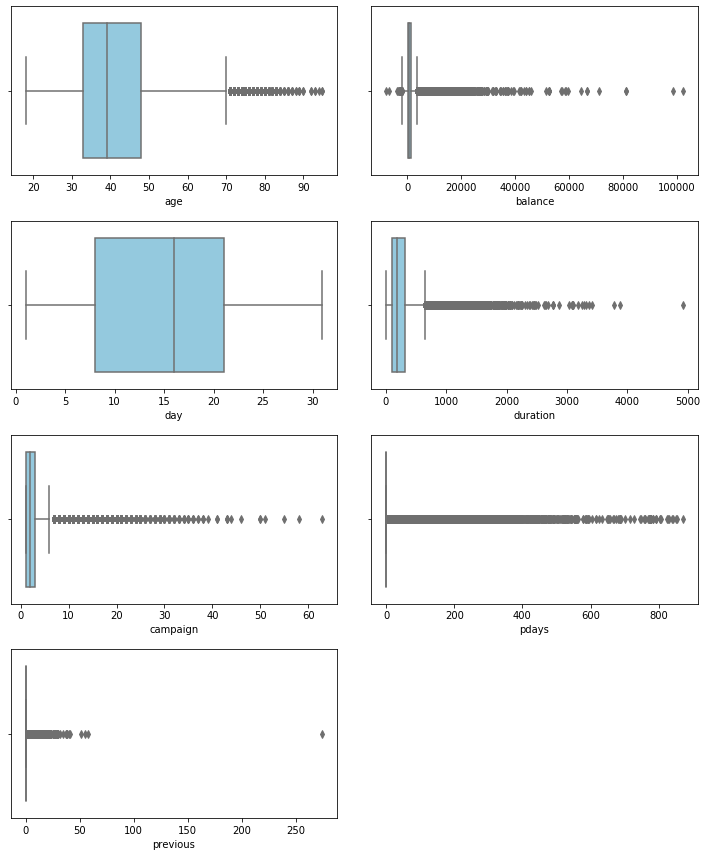

In [27]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()
sns.boxplot(x='age',data=data,color='skyblue',ax=axe[0]) 
sns.boxplot(x='balance',data=data,color='skyblue',ax=axe[1]) 
sns.boxplot(x='day',data=data,color='skyblue',ax=axe[2]) 
sns.boxplot(x='duration',data=data,color='skyblue',ax=axe[3]) 
sns.boxplot(x='campaign',data=data,color='skyblue',ax=axe[4]) 
sns.boxplot(x='pdays',data=data,color='skyblue',ax=axe[5])
sns.boxplot(x='previous',data=data,color='skyblue',ax=axe[6]) 
fig.tight_layout() 
fig.show() 
axe.flat[-1].set_visible(False)


In [28]:
#Understanding from boxplots
 #Prove the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
 #Values less than 0 are present in 'Balance' column

# Distribution of Target column

In [29]:
data['Target'].value_counts().to_frame('Target feature distribution')

,Target feature distribution
no,39922
yes,5289


In [32]:
#From above values it can be stated that the dataset is imbalanced.

In [33]:
df=data.copy()
encoder=LabelEncoder()
df['default']=encoder.fit_transform(df['default']).astype(int)
df['marital']=encoder.fit_transform(df['marital']).astype(int)
df['loan']=encoder.fit_transform(df['loan']).astype(int)
df['housing']=encoder.fit_transform(df['housing']).astype(int)
df['Target']=encoder.fit_transform(df['Target']).astype(int)
df['month']=encoder.fit_transform(df['month']).astype(int)
df['poutcome']=encoder.fit_transform(df['poutcome']).astype(int)
df['education']=encoder.fit_transform(df['education']).astype(int)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [35]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
    

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# Handling Outliers with mean replacement

In [39]:
meanbal = float(df['balance'].mean())
df['balance'] = np.where(df['balance'] >np.percentile(df['balance'], 75), meanbal,df['balance']) 
meandur = float(df['duration'].mean()) 
df['duration'] = np.where(df['duration'] >np.percentile(df['duration'], 75), meandur,df['duration'])
meancam = float(df['campaign'].mean()) 
df['campaign'] = np.where(df['campaign'] >np.percentile(df['campaign'], 75), meancam,df['campaign'])
meanpd = float(df['pdays'].mean()) 
df['pdays'] = np.where(df['pdays'] >np.percentile(df['pdays'], 75), meanpd,df['pdays'])
meanpr = float(df['previous'].mean()) 
df['previous'] = np.where(df['previous'] >np.percentile(df['previous'], 75),meanpr ,df['previous'])

# after removing outliers

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


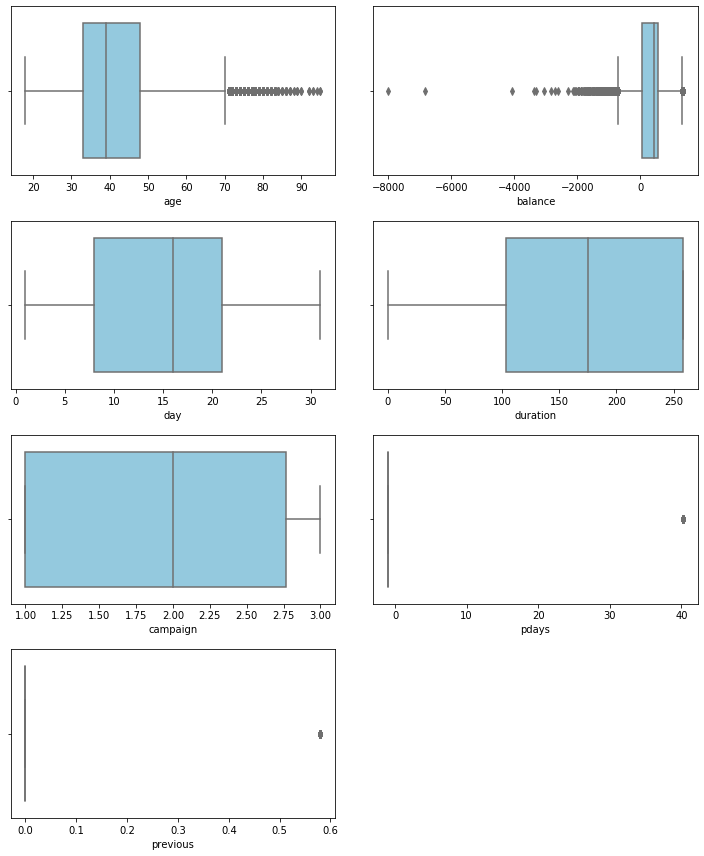

In [41]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()
sns.boxplot(x='age',data=df,color='skyblue',ax=axe[0]) 
sns.boxplot(x='balance',data=df,color='skyblue',ax=axe[1]) 
sns.boxplot(x='day',data=df,color='skyblue',ax=axe[2]) 
sns.boxplot(x='duration',data=df,color='skyblue',ax=axe[3]) 
sns.boxplot(x='campaign',data=df,color='skyblue',ax=axe[4]) 
sns.boxplot(x='pdays',data=df,color='skyblue',ax=axe[5])
sns.boxplot(x='previous',data=df,color='skyblue',ax=axe[6]) 
fig.tight_layout() 
fig.show() 
axe.flat[-1].set_visible(False)


# corr plot of all features

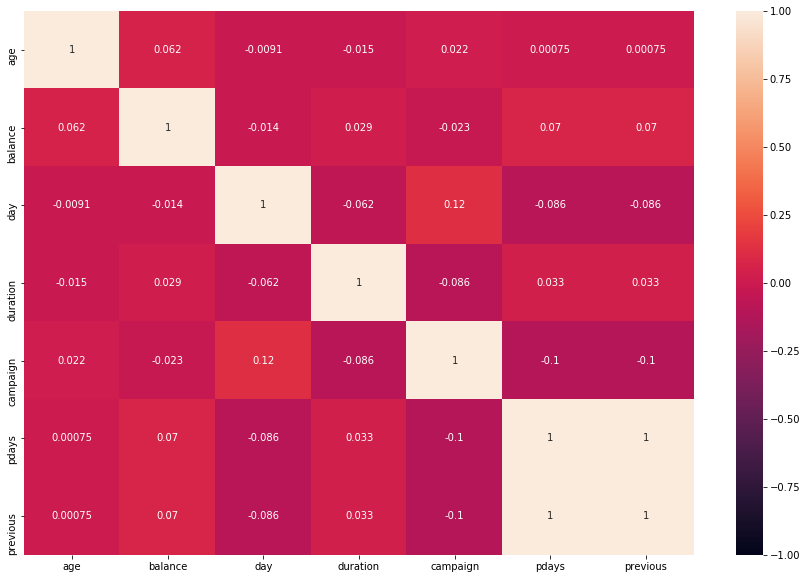

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1) 

In [44]:
#'pdays' and 'previous' are highly correlated

# Removing columns

In [45]:
#job','education' and 'contact' attributes contain multiple unknown values.
    # As they are specific string values and not numerical so cannot be treated with median, mean replacement
    # As per data description, duration attribute is removed to have a realistic prediction,'day' and 'month' of contact will not have any realtionship with customer opting for subscription\n",
    # 'pdays' and 'previous' are highly correlated so removing any one from both of them.
    #  Even though 'poutcome' has a huge number of 'Unknown' values, it is kept because 'poutcome' is outcome of the previous marketing campaign. Which can help in better training and testing of models."

In [46]:
df2 = df.drop(['job','education','contact','duration','pdays','day','month'],axis=1) 
df2.head() 

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,578.780234,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,578.780234,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# Pairplot of features

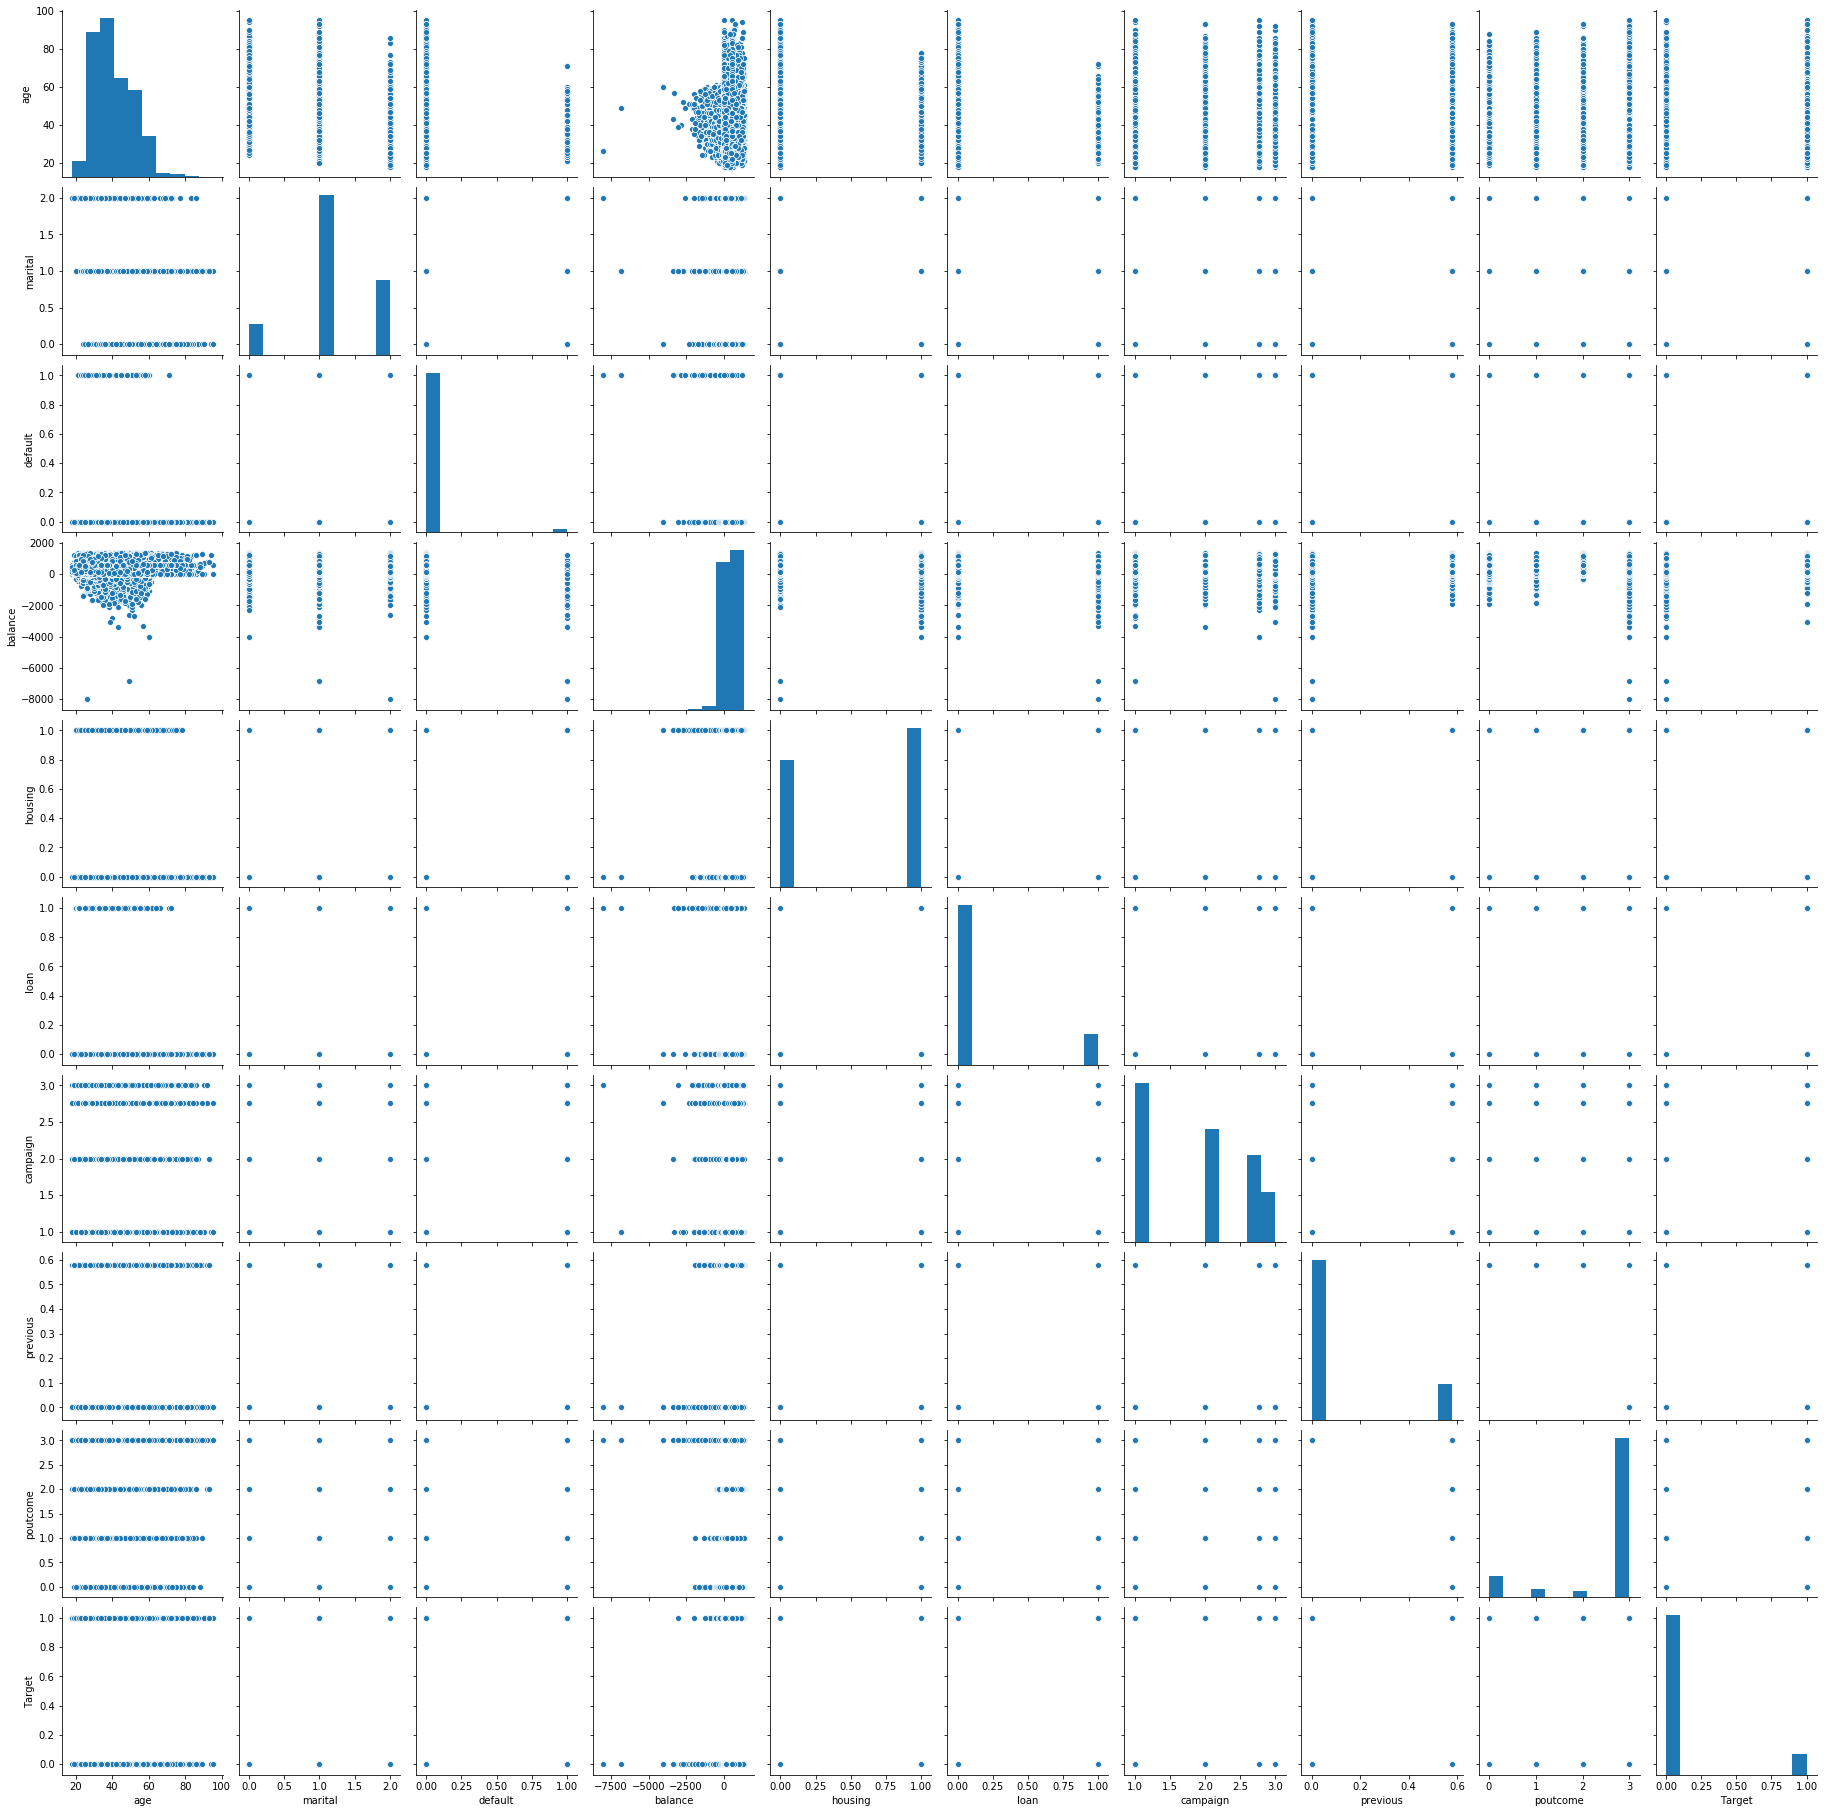

In [47]:
sns.pairplot(df2) 

# split data for training and testing in ratio 70:30

In [51]:
X = df2.drop('Target',axis=1) 
y = df2['Target'] 
y.head(1)   

0    0
Name: Target, dtype: category
Categories (2, int64): [0, 1]

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1) 

# scalling the data

In [53]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test) 

# models

# 1. Logistic Regression

In [59]:
logic_r = LogisticRegression(solver='liblinear')
logic_r.fit(X_train_scaled,y_train) 
y_pred = logic_r.predict(X_test_scaled) 
LR_accuracy = accuracy_score(y_test,y_pred)
print('\nConfusion matrix\n',confusion_matrix(y_test,y_pred))
print('\n Accuracy score\n',LR_accuracy*100)
print('\n Classification Report\n \n',classification_report(y_test,y_pred))


Confusion matrix
 [[11899   114]
 [ 1317   234]]

 Accuracy score
 89.450014744913

 Classification Report
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.67      0.15      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



# 2.  Naive Bayes

In [61]:
NB = GaussianNB()   
NB.fit(X_train_scaled,y_train) 
y_predi = NB.predict(X_test_scaled) 
NB_accuracy = accuracy_score(y_test,y_pred)
print('\nConfusion matrix\n',confusion_matrix(y_test,y_predi))
print('\n Accuracy score\n',NB_accuracy*100)
print('\n Classification Report\n \n',classification_report(y_test,y_predi))


Confusion matrix
 [[10698  1315]
 [ 1047   504]]

 Accuracy score
 89.450014744913

 Classification Report
 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.28      0.32      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.59      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564



# 3. KNN Model

In [63]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train) 
y_predict = knn.predict(X_test_scaled) 
KNN_accuracy = accuracy_score(y_test,y_predict)
print('\nConfusion matrix\n',confusion_matrix(y_test,y_predict))
print('\n Accuracy score\n',KNN_accuracy*100)
print('\n Classification Report\n \n',classification_report(y_test,y_predict))


Confusion matrix
 [[11480   533]
 [ 1225   326]]

 Accuracy score
 87.03922146859333

 Classification Report
 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.38      0.21      0.27      1551

    accuracy                           0.87     13564
   macro avg       0.64      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



# 4. SVC

In [64]:
svc = SVC() 
svc.fit(X_train_scaled,y_train) 
y_predicted = svc.predict(X_test_scaled)
SVC_accuracy = accuracy_score(y_test,y_predicted)
print('\nConfusion matrix\n',confusion_matrix(y_test,y_predicted))
print('\n Accuracy score\n',SVC_accuracy*100)
print('\n Classification Report\n \n',classification_report(y_test,y_predicted))


Confusion matrix
 [[11869   144]
 [ 1268   283]]

 Accuracy score
 89.59009141846063

 Classification Report
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.29      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.88      0.90      0.87     13564



# 5. decision tree

In [66]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) 
dTree.fit(X_train, y_train) 
dt_pred = dTree.predict(X_test)
DT_accuracy = accuracy_score(y_test,dt_pred)
print('\nConfusion matrix\n',confusion_matrix(y_test,dt_pred))
print('\n Accuracy score\n',DT_accuracy*100)
print('\n Classification Report\n \n',classification_report(y_test,dt_pred))


Confusion matrix
 [[10974  1039]
 [ 1178   373]]

 Accuracy score
 83.65526393394279

 Classification Report
 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     12013
           1       0.26      0.24      0.25      1551

    accuracy                           0.84     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.84      0.83     13564



# Feature importance test for decision tree

In [67]:
xvar = df2.drop('Target', axis=1)
feature_cols = xvar.columns
feat_importance = dTree.tree_.compute_feature_importances(normalize=False) 
feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_)) 
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') 
feat_imp.sort_values(by=0, ascending=False) 

,0
balance,0.451100
age,0.246115
poutcome,0.094259
campaign,0.076580
marital,0.045666
previous,0.034401
loan,0.025169
housing,0.023013
default,0.003697


# 6. Bagging Ensemble Model

In [69]:
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) 
bagc = bagc.fit(X_train, y_train) 
predicted_BAG = bagc.predict(X_test) 
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
print('\nConfusion matrix\n',confusion_matrix(y_test,predicted_BAG))
print('\n Accuracy score\n',BAG_accuracy*100)
print('\n Classification Report\n \n',classification_report(y_test,predicted_BAG))    


Confusion matrix
 [[11613   400]
 [ 1233   318]]

 Accuracy score
 87.96077853140667

 Classification Report
 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.44      0.21      0.28      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



# 7. Adaptive Boosting Ensemble Model

In [71]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1) 
adab = adab.fit(X_train, y_train)
predicted_ADA = adab.predict(X_test) 
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
print('\nConfusion matrix\n',confusion_matrix(y_test,predicted_ADA))
print('\n Accuracy score\n',ADA_accuracy*100)
print('\n Classification Report\n \n',classification_report(y_test,predicted_ADA))      


Confusion matrix
 [[11889   124]
 [ 1312   239]]

 Accuracy score
 89.41315246240048

 Classification Report
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.15      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



# 8. Random Forest Ensemble Model

In [72]:
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)
randf = randf.fit(X_train, y_train) 
predicted_RAN = randf.predict(X_test) 
RAN_accuracy = accuracy_score(y_test,predicted_RAN)
print('\nConfusion matrix\n',confusion_matrix(y_test,predicted_RAN))
print('\n Accuracy score\n',RAN_accuracy*100)
print('\n Classification Report\n \n',classification_report(y_test,predicted_RAN))     


Confusion matrix
 [[11568   445]
 [ 1230   321]]

 Accuracy score
 87.65113535830139

 Classification Report
 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.42      0.21      0.28      1551

    accuracy                           0.88     13564
   macro avg       0.66      0.58      0.60     13564
weighted avg       0.85      0.88      0.86     13564



# 9. Gradient Boosting

In [74]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) 
gradb = gradb.fit(X_train, y_train)
predicted_GRAD = gradb.predict(X_test) 
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('\nConfusion matrix\n',confusion_matrix(y_test,predicted_GRAD))
print('\n Accuracy score\n',GRAD_accuracy*100)
print('\n Classification Report\n \n',classification_report(y_test,predicted_GRAD))    


Confusion matrix
 [[11884   129]
 [ 1301   250]]

 Accuracy score
 89.45738720141551

 Classification Report
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.60     13564
weighted avg       0.87      0.89      0.87     13564



# Execute result

In [75]:
Scores = [('Naive bayes', NB_accuracy),
          ('KNN', KNN_accuracy),
          ('Logistic Regression', LR_accuracy),
          ('SVC', SVC_accuracy ),
          ('Decision Tree',DT_accuracy),
          ('Bagging',BAG_accuracy),
          ('Adaptive Boosting',ADA_accuracy),
          ('Gradient Boosting',GRAD_accuracy),
          ('Random Forest',RAN_accuracy)] 
Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score']) 
print('\\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False)


\033Current Scores with Outliers replaced with mean:


,Model,Accuracy score
3,SVC,0.895901
7,Gradient Boosting,0.894574
0,Naive bayes,0.894500
2,Logistic Regression,0.894500
6,Adaptive Boosting,0.894132
5,Bagging,0.879608
8,Random Forest,0.876511
1,KNN,0.870392
4,Decision Tree,0.836553


# Conclusion

In [76]:
     #Comments on dataset:
# The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion matrix of all models. 
# The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models. 
# Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge. Which trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.
# This situation could have been avoided if the datset was balanced. 
# Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome' columns.
   
     # Comments on  Models:
# SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data.
# After removing the 'duration' column, The highest model score dropped by 0.5%.
# The Outliers did not affect much on accuracy scores of all models. As can be seen in above accuracy scores, getting rid of outliers by mean/median replacement did not affect the scores.
# In Decision Trees, Gradient boosting method always performed better for this dataset.